<center><h1 style="color:blue"><b>Google Playstore EDA</b></h1></center>

### In this notebook, we are aiming to understand the trend of current Google Playstore market.  

<i>But Why ???</i>   

<b>Because as a developer, I should know the best constraints to focus on when launching my first app :D .  
    And I definitely have no intention of getting lost in this vast ocean of versatile apps XD</b>  

So stay with me on this short journey. 

------------------------------------------------------------------------------------------------------
    

## Content

<a href="#Description-of-Dataset">Description of Dataset</a>  

<a href="#Features-Engineering">Features Engineering</a>  

<a href="#Visulaizations ">Visulaizations </a> 

<a href="#Missing-Data-Study">Missing Data Study</a>  

<a href="#Conclusion">Conclusion</a>  

------------------------------------------------------------------------------------------------------------------

In [9]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
import missingno as msno
#Interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [10]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
 $('div.cell.code_cell.rendered.selected div.input').hide();
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" class="btn btn-primary" value="Click here to toggle on/off the raw code."></form>''')

## Description of Dataset

<h3>We are going to use a simple csv file "Playstore.csv", available on Kaggle.  
Before getting into actual <i>movie</i>, let's have a look at our main characters :- </h3> 

    1) App :- Name of the App
    2) Category :- Category under which the App falls.
    3) Rating :- Application's rating on playstore
    4) Reviews :- Number of reviews of the App.
    5) Size :- Size of the App.
    6) Install :- Number of Installs of the App
    7) Type :- If the App is free/paid
    8) Price :- Price of the app (0 if it is Free)
    9) Content Rating :- Appropiate Target Audience of the App.
    10) Genres:- Genre under which the App falls.
    11) Last Updated :- Date when the App was last updated
    12) Current Ver :- Current Version of the Application
    13) Android Ver :- Minimum Android Version required to run the App
    
<i>So now we know our characters and a basic plot, lets start our movie with no more delay. </i>

In [11]:
#Reading data
storedata = pd.read_csv("input/googleplaystore.csv")

print("\n First 7 rows in our dataset")
display(storedata.head(7))

print("\n Number of rows in our dataset = " + str(storedata.shape[0]))


 First 7 rows in our dataset


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up



 Number of rows in our dataset = 10841


## Features Engineering  

Like any other movie, our movie will also revolve around one main character. In this story, it is <b>'Installs'</b>. We will see who all character are his friends, foes and the ones who just doesn;t care about him.   

As we can see from the beginning Genres are Category are somewhat same. So we can omit Category as Genres present all its relevant information along with sub-categories. <i> Sayonara Category </i>  

Before getting into action part, our favourite <i>visualization</i> part, we will transform our character to a state where it is really easy for them to do all cool actions and deliver us amazing visualizations.

    1) As far as I can understand, 'last updated' gives us to know if the developers are still improving this     app or moved on to some other work. So we can just update our data accordingly to easily represent that.
    2) 'Android Ver.' can be represented more easily to use it in visualization.

Ok ... Let's continue !!
    

In [12]:
#Last Updated to (Month, Year) to number
storedata['Last Updated'] = pd.to_datetime(storedata['Last Updated'],format='%B %d, %Y',errors='coerce').astype('str')

def split_mul(data):
    try:
        data=list(map(int,data.split('-')))
        return data[0]+(data[1]*12)+data[2]
    except:
        return "Nan"
storedata['Last Updated'] = [split_mul(x) for x in storedata['Last Updated']]

#Improve 'Android Ver' and 'Installs' representation
storedata["Android Ver"] = storedata["Android Ver"].str.split(n=1).str[0]

def deal_with_abnormal_strings(data):
    data[data.str.isnumeric()==False]=-1
    data=data.astype(np.float32)
    return data

storedata.Installs = [x.strip().replace('+', '').replace(',','') for x in storedata.Installs]
storedata.Installs = deal_with_abnormal_strings(storedata.Installs)

storedata.Size = [x.strip().replace('M', '').replace(',','') for x in storedata.Size]

def convert_float(val):
    try:
        return float(val)
    except ValueError:
        try:
            val=val.split('.')
            return float(val[0]+'.'+val[1])
        except:
            return np.nan



In [13]:
storedata.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0,Everyone,Art & Design,2037,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2045,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design,2115,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0,Teen,Art & Design,2098,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,2110,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0,Everyone,Art & Design,2079,1.0,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000.0,Free,0,Everyone,Art & Design,2092,1.1,4.0.3


## Visulaizations 

Now we'll get into the fun part. We will try different visualization techniques to understand the life of our hero "Installs" and other characters.

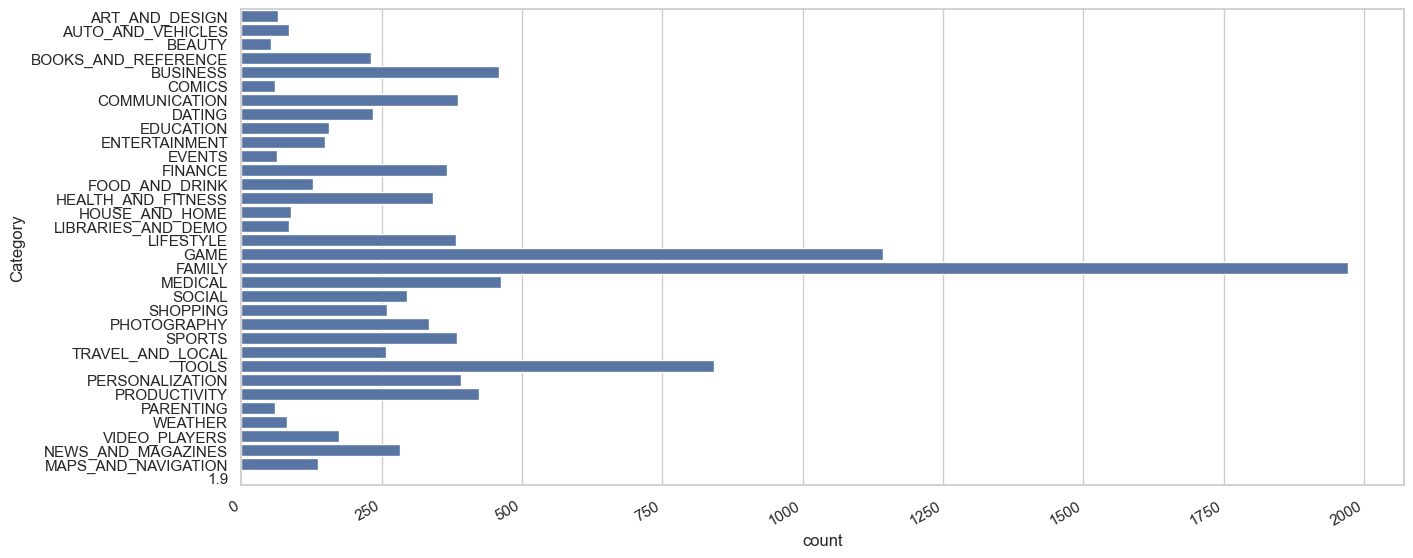

,Category,Count
12,FAMILY,1972
15,GAME,1144
30,TOOLS,843
21,MEDICAL,463
5,BUSINESS,460
26,PRODUCTIVITY,424


In [14]:
#Number of categories of apps in the store.....
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)
    fig.autofmt_xdate()
    countplot=sns.categorical.countplot(storedata.Category,ax=ax)
    plt.show(countplot)

plot_number_category()

# Tabular representation
top_cat=storedata.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)


Now we know that 'Family' and 'Game' category rules the playstore market, followed by Tools,Medical and Business.
<b>Okay Cool ..... </b> Developers understand our daily requirements and filling the market by similar apps.
So lets compare this 5 apps with their actual installs.

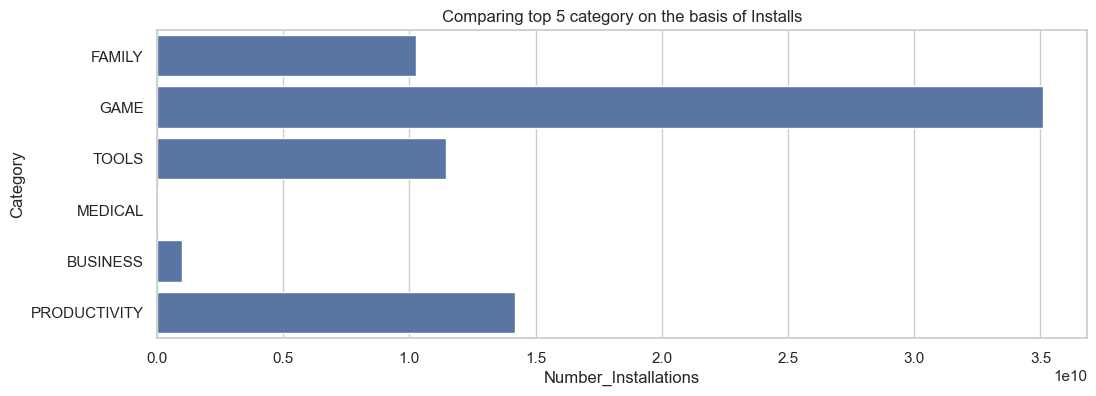

In [15]:


cat=top_cat.Category.tolist()
data_top6=storedata.groupby('Category')['Installs'].agg('sum').loc[cat].reset_index(name='Number_Installations')
data=storedata.groupby('Category')['Installs'].agg('sum').reset_index(name='Number_Installations')

#Comparing top 5 category on the basis of 'Installs'
def compare_6(data):
    fig = plt.figure(figsize=(12,4))
    title=plt.title('Comparing top 5 category on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)

#Comparing all categoryies on the basis of 'Installs'
def compare_all(data):
    fig = plt.figure(figsize=(12,7))
    title=plt.title('Comparing all categories on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)
    
compare_6(data_top6)



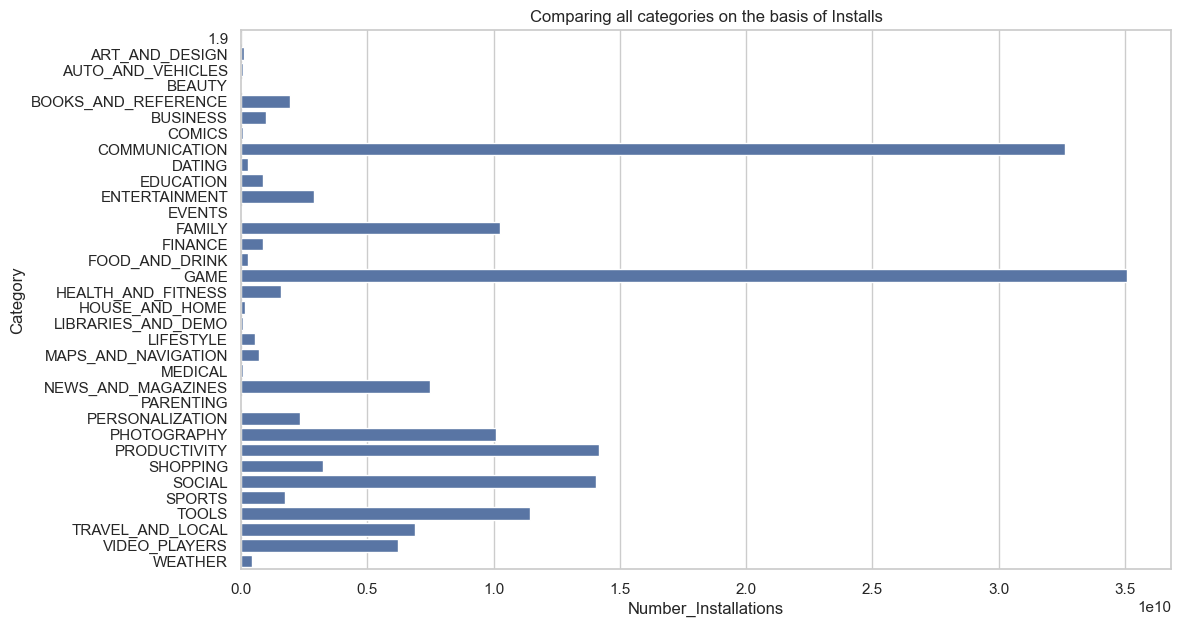

In [16]:
compare_all(data)

In [17]:
print('\nTabular Rep.Of Top 5 Number of Installation by Category')
display(data.nlargest(6,'Number_Installations'))


Tabular Rep.Of Top 5 Number of Installation by Category


,Category,Number_Installations
15,GAME,3.508602e+10
7,COMMUNICATION,3.264728e+10
26,PRODUCTIVITY,1.417609e+10
28,SOCIAL,1.406987e+10
30,TOOLS,1.145277e+10
12,FAMILY,1.025826e+10


<b>Woww...</b> Family betrayed our 'Installs'.As we have seen so far, list of Top 6 Categories (acc. to number of apps developed) and Top 6 categories (acc. to number of Installs) differ a lot.  
We can feel this story. As a developer, we can use this information to decide our future projects.  

Till now, our movie has been building slowly. Now let's increase its pace and see the relationship of our hero 'Installs' with other characters......

In [18]:
#features to use for correlation
corr_cat=['Rating','Reviews','Size','Installs','Current Ver','Android Ver','Last Updated']
for i in corr_cat:
    storedata[i]=storedata[i].apply(lambda x: convert_float(x)) #To get it compatible to check correlation

correlation = storedata[corr_cat].corr()

print("\n Correlation of Installs with other selected features ")
display(correlation['Installs'].sort_values(ascending=False))




 Correlation of Installs with other selected features 


Installs        1.000000
Reviews         0.643122
Size            0.162557
Rating          0.048652
Last Updated    0.042500
Android Ver     0.037211
Current Ver    -0.002024
Name: Installs, dtype: float64

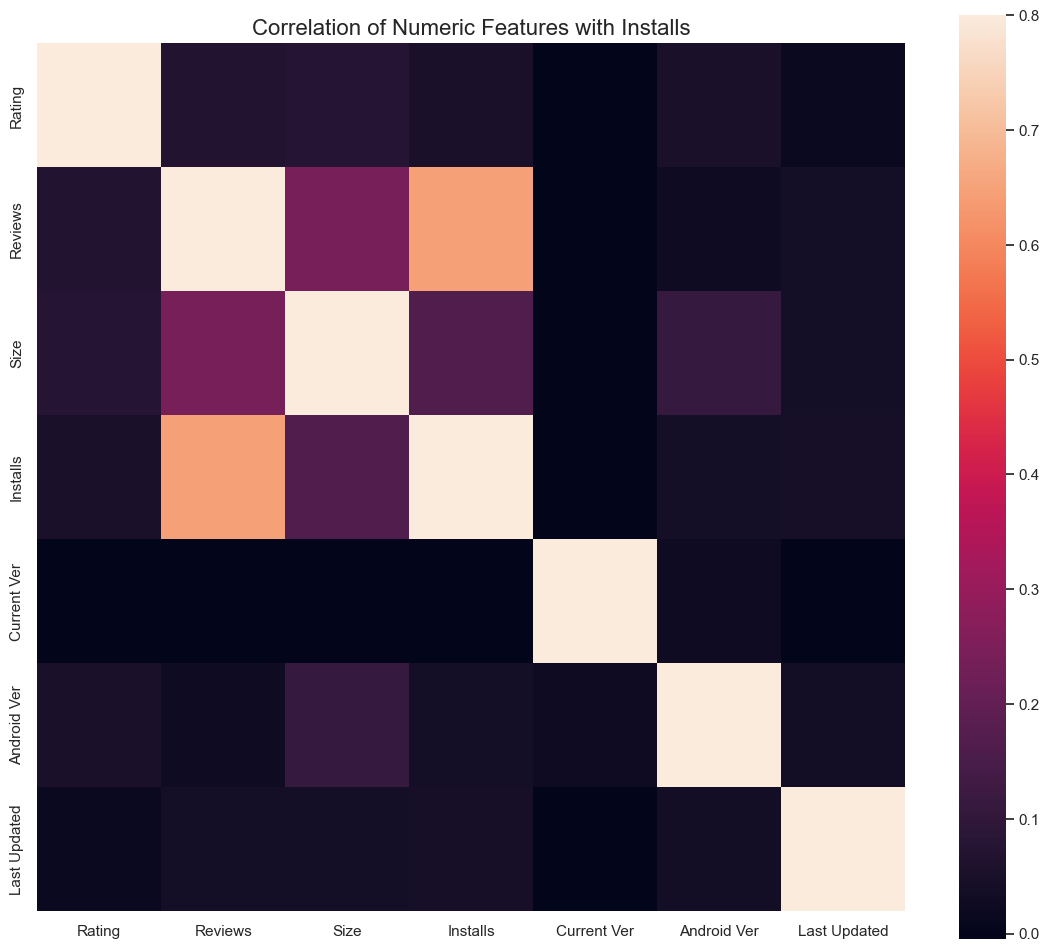

In [19]:
#Correlation Heatmap 
f , ax = plt.subplots(figsize = (14,12))
title=plt.title('Correlation of Numeric Features with Installs',y=1,size=16)
heatmap=sns.heatmap(correlation,square = True,  vmax=0.8)
plt.show(heatmap)

<b>Are you surprised ???? </b>  
I am .. 'Installs' is really so alone. No neighbour cares about him. They all are completely uncorrelated except Reviews. Reviews seems to have some effect on number of Installs. <b>BUT WAIT</b>  We can be wrong here. It seems to be a minor data leakage condition. With more installs comes more reviews. So they are more codependant.   

<i>There's still some hope for our hero. We'll have happy ending. Let's check the categorical features for some positive information. Hang on ;)</i>

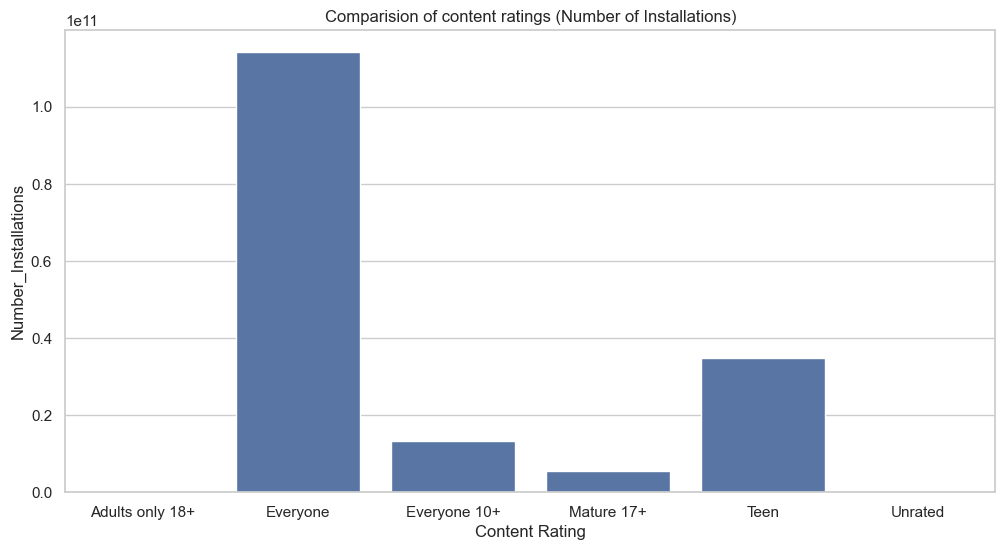

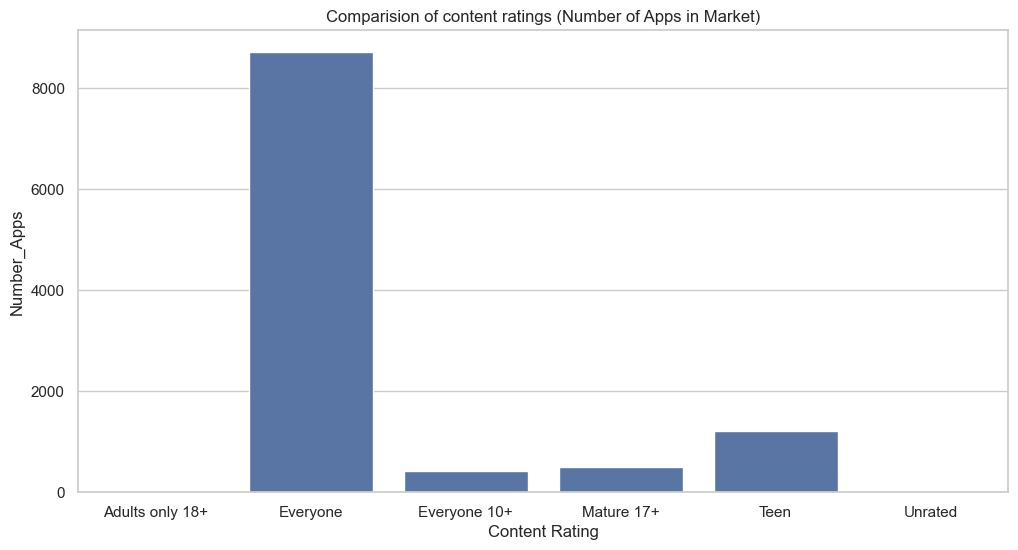

In [20]:
install_sum_content=storedata.groupby('Content Rating')['Installs'].agg('sum').reset_index(name='Number_Installations')
app_sum_content=data=storedata.groupby('Content Rating')['Installs'].size().reset_index(name='Number_Apps')

def content_bar_sum(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of content ratings (Number of Installations)')
    content_bar = sns.barplot(x=data['Content Rating'],y=data['Number_Installations'])
    plt.show(content_bar)
    
def content_bar_count(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of content ratings (Number of Apps in Market)')
    content_bar = sns.barplot(x=data['Content Rating'],y=data['Number_Apps'])
    plt.show(content_bar)
    
content_bar_sum(install_sum_content)
content_bar_count(app_sum_content)


Okay !! It seems like 'Everyone' is the only choice for us to prefer. But no.... let's dive into this two graphs more to get good intel. Number of 'Teen' Apps are few as compared to 'Everyone' but when we check its 'Number of Installations', it seems like a good second best choice. <b>Few apps but Considerable Installations</b>  
Ahaaa !! Our hero 'Install' just got his first good partner XD. Let's interrogate him.

In [21]:
#Temporary dataframe with improved comparision metric for content rating
content=pd.DataFrame()
content['Content Rating'] = app_sum_content['Content Rating']
content['No_Installations/Total_Apps']=install_sum_content['Number_Installations']/app_sum_content['Number_Apps']

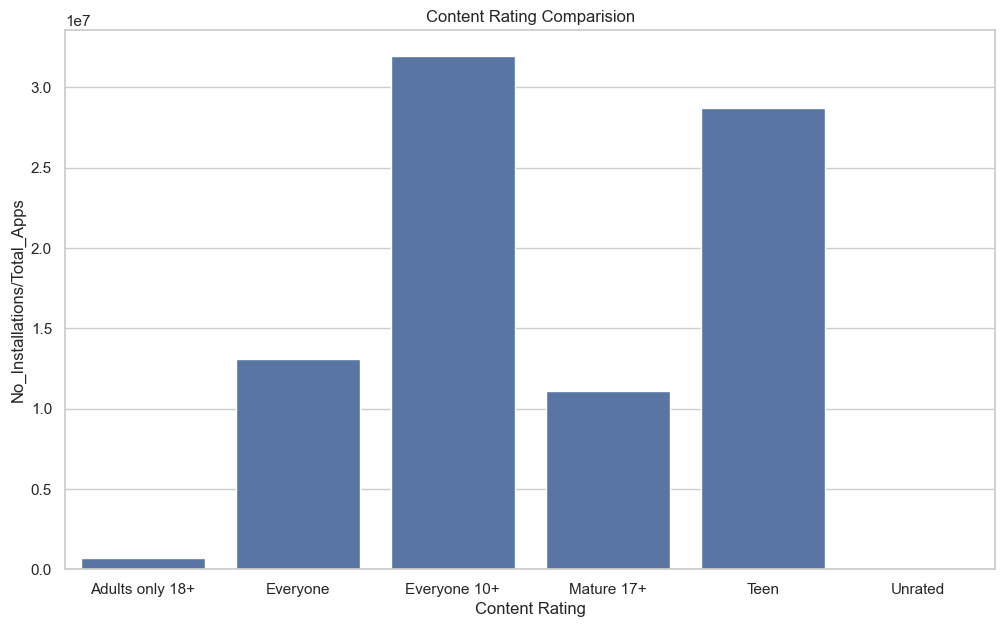

In [22]:
#Visualize content
figure=plt.figure(figsize=(12,7))
title=plt.title('Content Rating Comparision')
bar=sns.barplot(x=content['Content Rating'],y=content['No_Installations/Total_Apps'])
plt.show(bar)

Ahhaaa !!! Isn't that like a suspensive movie twist ;)  
By a little tweak, we have got a completely different story. 'Everyone' is an easy option but 'Teen' and '10+' are the most rewarding.  
And so, our hero 'Installs' moves forward on his journey. He has two paths to go :- 'Free' and 'Paid'. Let's see what happens now and what moves our hero.

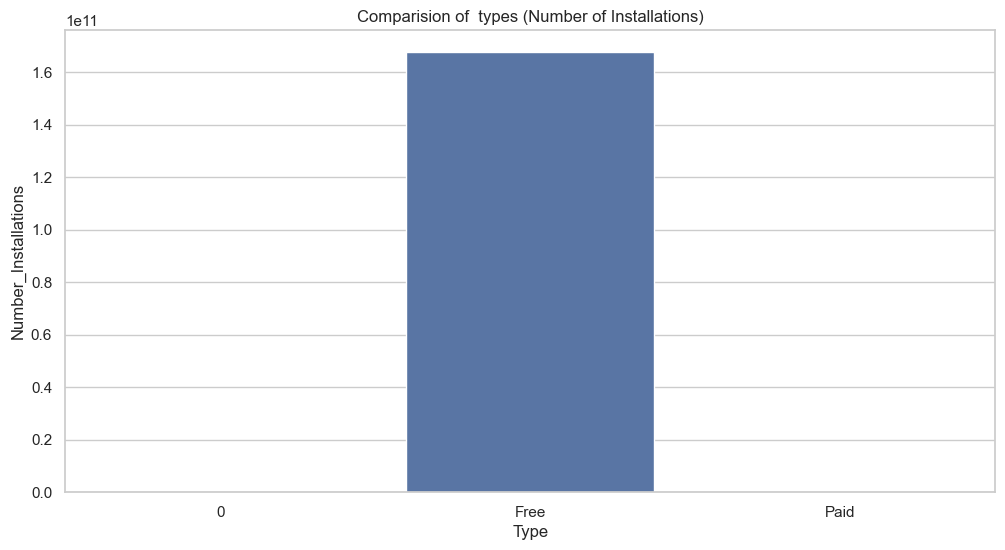

In [23]:
install_sum_type=storedata.groupby('Type')['Installs'].agg('sum').reset_index(name='Number_Installations')

def type_bar_sum(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of  types (Number of Installations)')
    content_bar = sns.barplot(x=data['Type'],y=data['Number_Installations'])
    plt.show(content_bar)
type_bar_sum(install_sum_type)

Yea... I know ... It was a boring part... It turns that in our storyline we have only one path ... 'Free' one....  

Have you ever wondered if the name of the App plays an impact on its number of installations!!!  
Let's feed our curiousity.  
<i>We'll make a feature column like :- App name greater than 2 words or not, and visualize the comparisions</i>

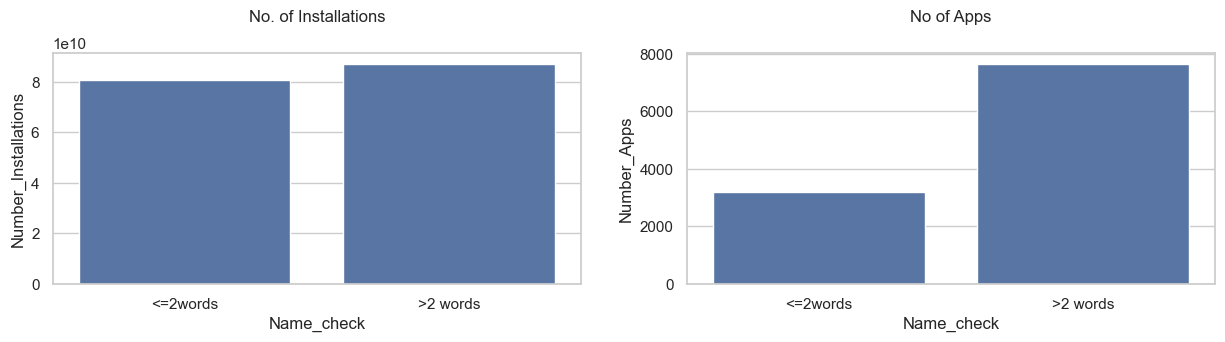

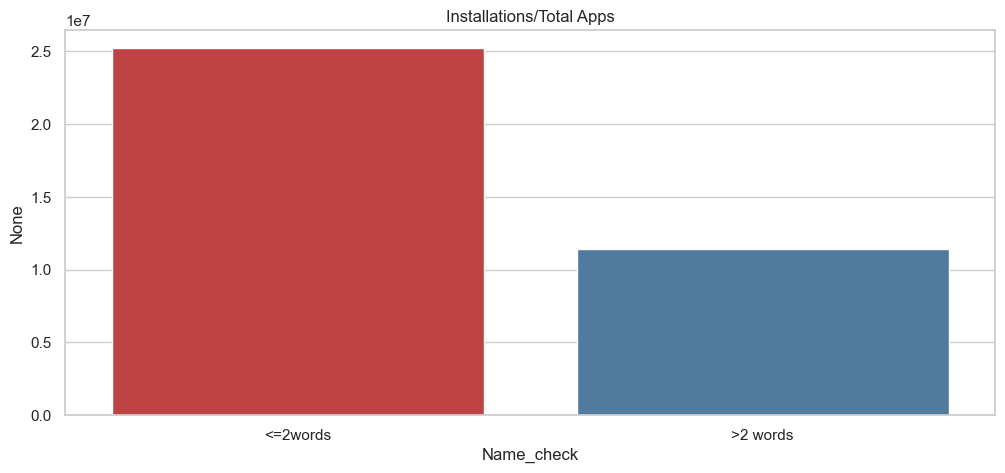

In [24]:
storedata['Name_check']=['>2 words' if len(x.split())>2 else '<=2words' for x in storedata['App'] ]

data_install= storedata.groupby('Name_check')['Installs'].agg('sum').reset_index(name='Number_Installations')
data_apps= storedata.groupby('Name_check').size().reset_index(name='Number_Apps')


fig,axes = plt.subplots(figsize=(15,3),ncols=2, nrows=1)

title=axes[0].set_title("No. of Installations", y = 1.1)
title=axes[1].set_title("No of Apps", y = 1.1)

plot1=sns.barplot( x=data_install['Name_check'],y=data_install['Number_Installations'] , ax=axes[0])

plot2=sns.barplot( x=data_apps['Name_check'],y=data_apps['Number_Apps'] , ax=axes[1])

plt.show(fig)

# No. of installation / No. of apps

figure=plt.figure(figsize=(12,5))
title=plt.title("Installations/Total Apps", y = 1.0)
plot3=sns.barplot( x=data_apps['Name_check'],y=data_install['Number_Installations']/data_apps['Number_Apps'] ,palette=sns.color_palette(palette="Set1",n_colors=2,desat=.8))
plt.show(figure)

As our visualizations speak, it is better to have a small name for our app. Well, I personally prefer small but effective names.  

<b>But the movie never ends without witnessing any villians. So it is required to witness villians of our data.</b>


## Missing Data Study


App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver       1667
Android Ver       1377
Name_check           0
dtype: int64

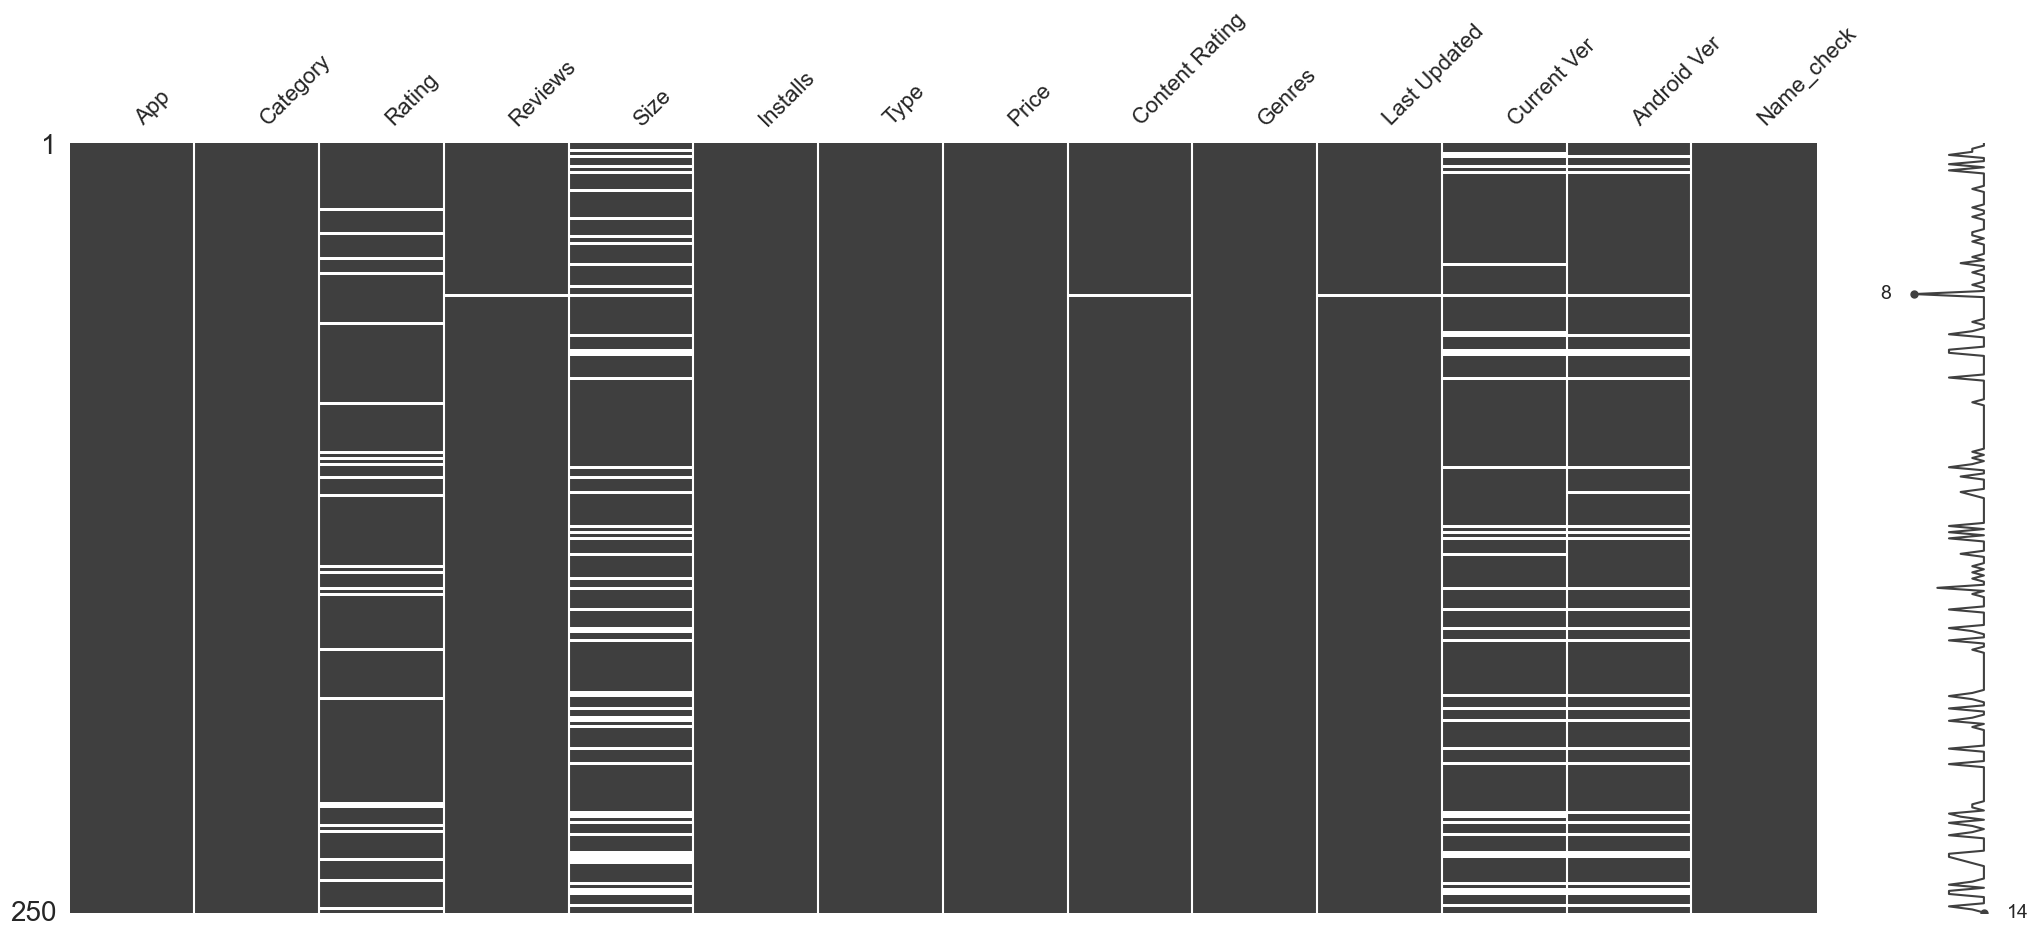

In [25]:
#Number of null values in each feature
storedata.isnull().sum()

#Visualising missing data
missing = msno.matrix(storedata.sample(250))

As we witnessed... Rating,Size,Current Ver. and Android Ver. have null values but our visualizations were not affected by this as we handled them during processing.  
Our hero is NaNproof XD.  

Let's the increase of this scene with <b>Missingno Correlation Heatmap</b>  
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

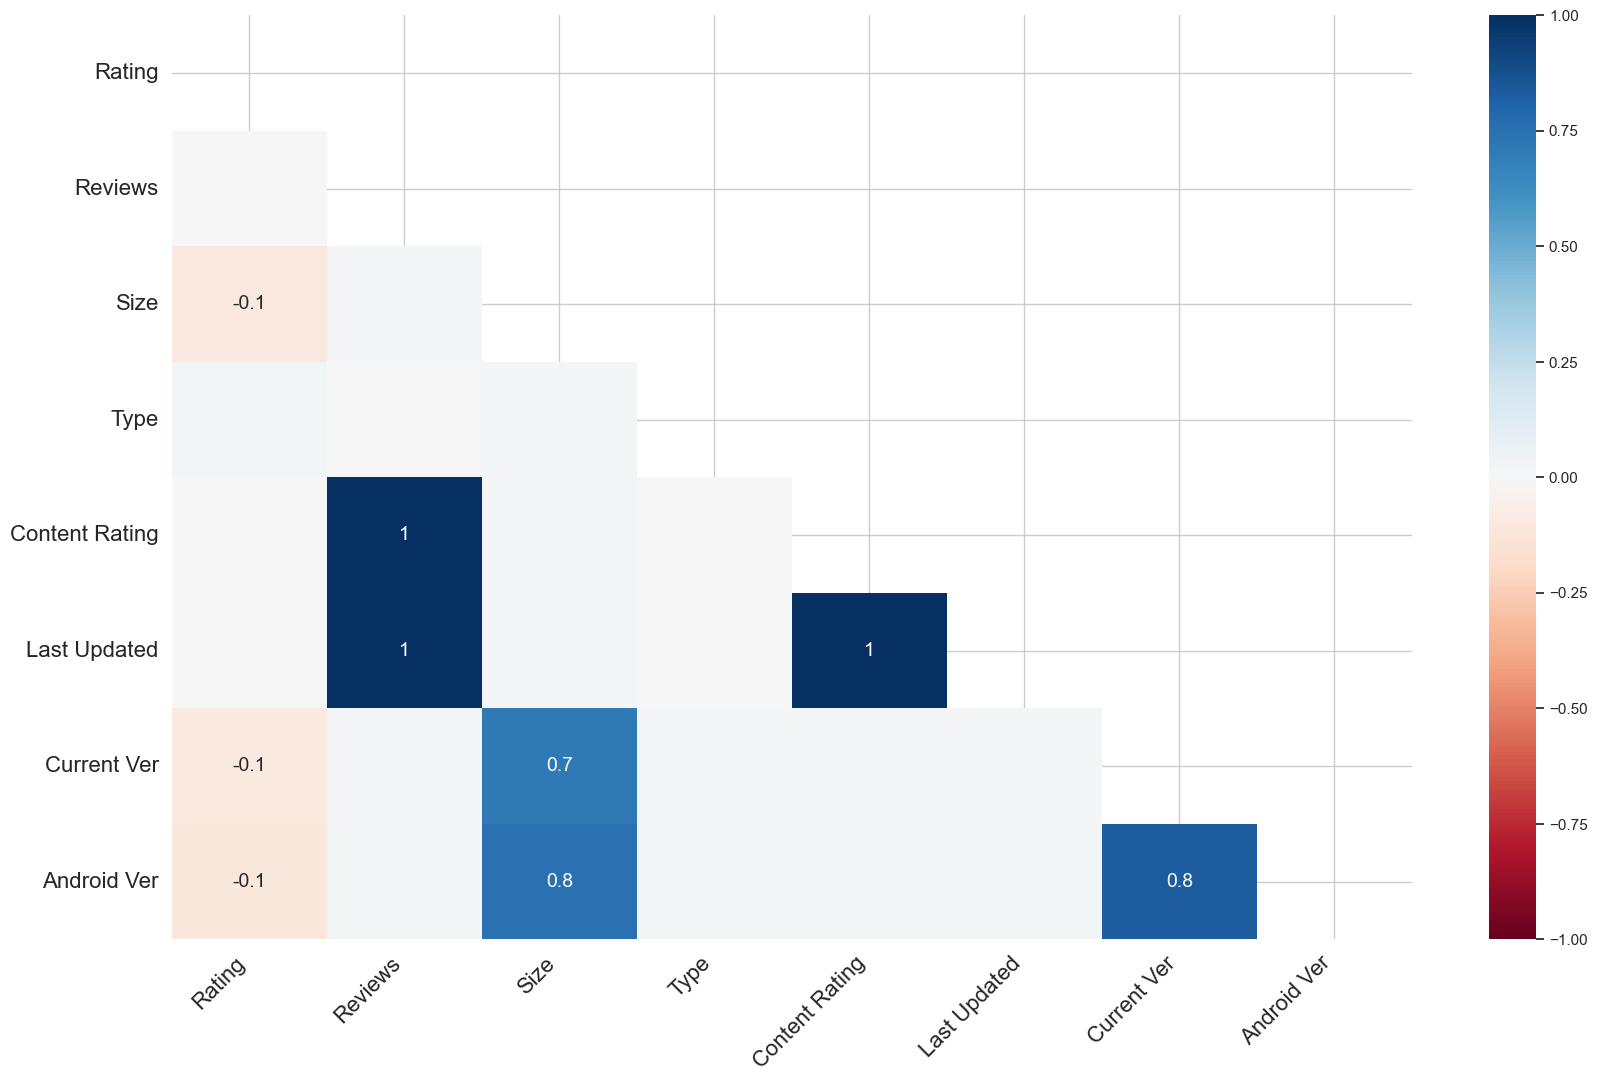

In [ ]:
mheatmap=msno.heatmap(storedata)

## Conclusion

Yayyy!!! This is the end of our movie. Hope you enjoyed this journey.  
In this, we have seen :-
    1) How every feature has an unique impact on the story.
    2) Why exploring data is important beforing starting to build ML models
    3) How visualizations make anything interesting. ;)
    4) There's hell lot of comeptition in Android market.

Final Note :- This is the first movie directed by me. I have always tried running away from EDA, because Deep Learning and ML models seems super interesting. But believe me, EDA is an important subject.  
And I will improve in this field and be regular with improved EDA's and interesting datasets.  
Stay connected :D ;)

<center><h1> Thank You !!!! </h1></center>